In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.style.use("./../figures/plotting.mplstyle")
import numpy as np
import h5py

import sys
sys.path.append('./../figures')
from makeCorner import plot_corner

sys.path.append('./../code/')
from utilities import *

Load the sumary file containing output of our standard parametrized inference of the BBH population.

In [2]:
hdata = h5py.File("baseline_summary.hdf","r")

# List attributes
for key in hdata.attrs.keys():
    print("{0}: {1}".format(key,hdata.attrs[key]))
    
# List groups and datasetes
print("\nGroups:")
print(hdata.keys())

print("\nData sets inside ['posterior']:")
print(hdata['posterior'].keys())

Created_by: process_baseline.py
Source_code: https://github.com/tcallister/autoregressive-bbh-inference

Groups:
<KeysViewHDF5 ['posterior']>

Data sets inside ['posterior']:
<KeysViewHDF5 ['R_ref', 'alpha', 'bq', 'kappa', 'log_dmMax', 'log_dmMin', 'log_f_peak', 'logsig_chi', 'mMax', 'mMin', 'min_log_neff', 'mu_chi', 'mu_m1', 'nEff_inj_per_event', 'sig_cost', 'sig_m1']>


The different `hdata['posterior/']` datasets correspond to the following:

| Name      | Description |
| :---------- | :---------- |
| `R_ref`     | The comoving BBH merger rate at $m_1=20\,M_\odot$ and $z=0.2$, in units $\mathrm{Gpc}^{-3} \mathrm{yr}^{-1}$  |
| `alpha` | Power-law index of the "power law" part our primary mass model |
| `mu_m1` | Mean of the Gaussian peak in our primary mass model |
| `sig_m1` | Standard deviation of the Gaussian peak in our primary mass model |
| `log_f_peak` | Log10 of the fraction of BBHs comprising the Gaussian peak, rather than the power law |
| `mMin` | Mass below which the primary mass distribution goes to zero |
| `mMax` | Mass above which the primary mass distribution goes to zero |
| `log_dmMin` | Log10 of the scale length over which the primary mass distribution is smoothly sent to zero below `mMin` |
| `log_dmMax` | Log10 of the scale length over which the primary mass distribution is smoothly sent to zero above `mMax` |
| `bq` | Power-law index governing the mass ratio distribution |
| `kappa` | This is the power-law index governing growth of the merger rate, assumed to evolve as $(1+z)^\kappa$ |
| `mu_chi` | Mean of the component spin magnitude distribution |
| `logsig_chi` | Log10 of the standard deviation of component spin magnitudes |
| `sig_cost` | Standard deviation of the component (cosine) spin-tilt distributions. Mean is assumed to the 1 for simplicity |
| `nEff_inj_per_event` | Number of effective injections per event informing our Monte Carlo estimate of detection efficiency |
| `min_log_neff` | For each posterior sample, minimum (log10) number of effective posterior samples informing our Monte Carlo estimates of each event's likelihood, taken over all events |

Make corner plots of all these quantities.
There are a lot of parameters, so split them across a few corner plots.
First, parameters describing masses:

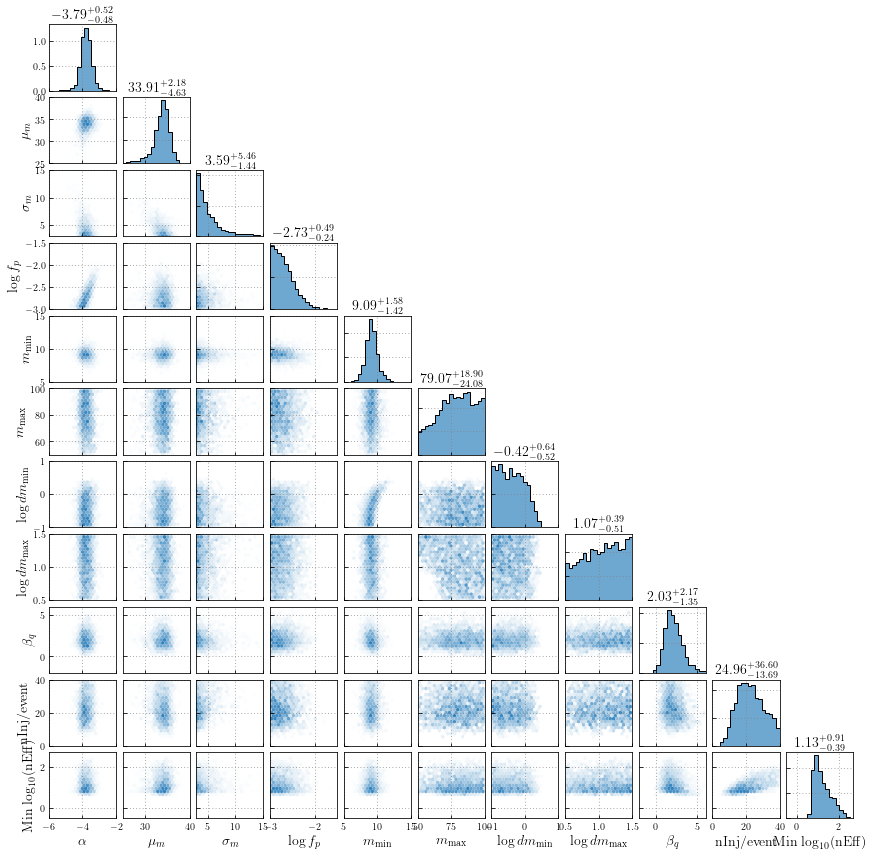

In [3]:
plot_data = {
    'alpha':{'data':hdata['posterior/alpha'][()],'plot_bounds':(-6,-2),'label':r'$\alpha$'},
    'mu_m1':{'data':hdata['posterior/mu_m1'][()],'plot_bounds':(25,40),'label':r'$\mu_m$'},
    'sig_m1':{'data':hdata['posterior/sig_m1'][()],'plot_bounds':(3,15),'label':r'$\sigma_m$'},
    'log_f_peak':{'data':hdata['posterior/log_f_peak'][()],'plot_bounds':(-3,-1.5),'label':r'$\log f_p$'},
    'mMin':{'data':hdata['posterior/mMin'][()],'plot_bounds':(5,15),'label':r'$m_\mathrm{min}$'},
    'mMax':{'data':hdata['posterior/mMax'][()],'plot_bounds':(50,100),'label':r'$m_\mathrm{max}$'},
    'log_dmMin':{'data':hdata['posterior/log_dmMin'][()],'plot_bounds':(-1,1),'label':r'$\log dm_\mathrm{min}$'},
    'log_dmMax':{'data':hdata['posterior/log_dmMax'][()],'plot_bounds':(0.5,1.5),'label':r'$\log dm_\mathrm{max}$'},
    'bq':{'data':hdata['posterior/bq'][()],'plot_bounds':(-2,6),'label':r'$\beta_q$'},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,40),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(12,12))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

Next, parameters governing spin:

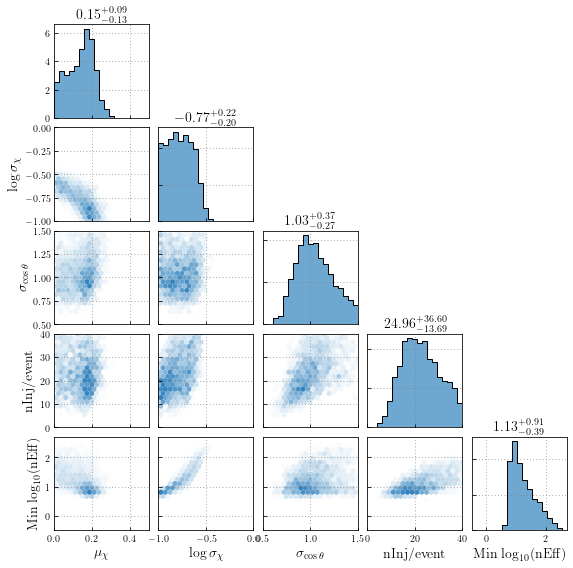

In [4]:
plot_data = {
    'mu_chi':{'data':hdata['posterior/mu_chi'][()],'plot_bounds':(0,0.5),'label':r'$\mu_\chi$'},
    'logsig_chi':{'data':hdata['posterior/logsig_chi'][()],'plot_bounds':(-1,0),'label':r'$\log\sigma_\chi$'},
    'sig_cost':{'data':hdata['posterior/sig_cost'][()],'plot_bounds':(0.5,1.5),'label':r'$\sigma_{\cos\theta}$'},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,40),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(8,8))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

And the merger rate and its evolution with redshift:

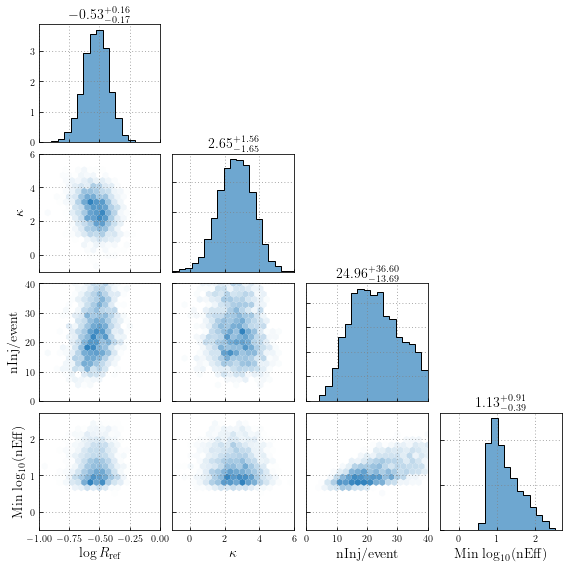

In [5]:
plot_data = {
    'logR_ref':{'data':np.log10(hdata['posterior/R_ref'][()]),'plot_bounds':(-1,0),'label':r'$\log R_\mathrm{ref}$'},
    'kappa':{'data':hdata['posterior/kappa'][()],'plot_bounds':(-1,6),'label':r'$\kappa$'},
    'neff':{'data':hdata['posterior/nEff_inj_per_event'][()],'plot_bounds':(0,40),'label':r'nInj/event'},
    'min_neff':{'data':hdata['posterior/min_log_neff'][()],'plot_bounds':(-0.5,2.7),'label':r'Min $\log_{10}$(nEff)'},
}

fig = plt.figure(figsize=(8,8))
plot_corner(fig,plot_data,'#3182bd')
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

Let's plot the actual measured distributions of BBH parameters:

### 1. Primary mass

We can show this a few different ways.
First, plot the merger rate $\frac{d\mathcal{R}}{d\ln m_1\,dq}$ as a function of $m_1$, evaluated at $q=1$ and $z=0.2$ and integrated over spin degrees of freedom.

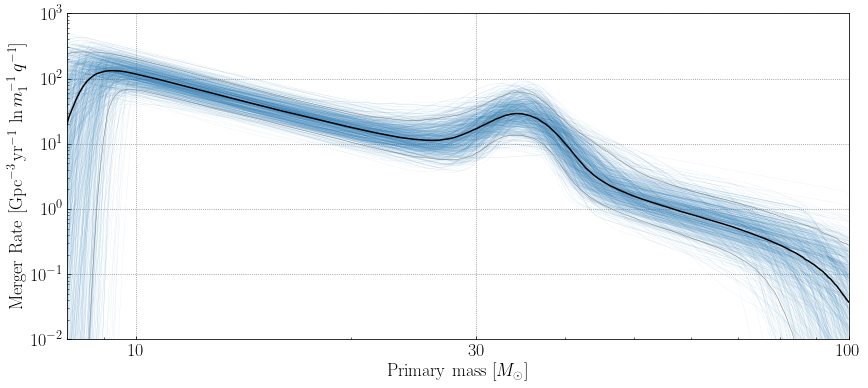

In [6]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]

# Grid over which to evaluate masses
mass_grid = np.linspace(5,100,1000)
dR_dlnm1 = np.zeros((R_ref.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    # Note that we need to normalize to m1=20, according to our definition of R_ref
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Probability density at q=1
    p_q_1 = (1.+bq[i])/(1.-(tmp_min/mass_grid)**(1.+bq[i]))
    
    # Combine
    # Note that, through the definition of R_ref, this is already defined at z=0.2
    # We additionally multiply by `mass_grid` to get a rate per log-mass, rather than a rate per mass
    dR_dlnm1[i,:] = R_ref[i]*f_m1*p_q_1*mass_grid

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),750):
    ax.plot(mass_grid,dR_dlnm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(dR_dlnm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(dR_dlnm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(dR_dlnm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-2,1e3)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

We can also show the merger rate *per unit primary mass* (rather than per unit *log* mass) $\frac{d\mathcal{R}}{dm_1\,dq}$ again evaluated at $q=1$ and $z=0.2$ and integrated over spin degrees of freedom:

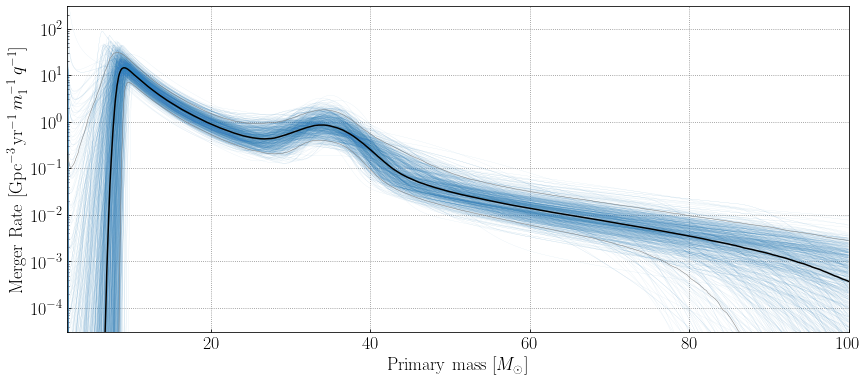

In [7]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]

# Grid over which to evaluate masses
mass_grid = np.linspace(1,100,1000)
dR_dm1 = np.zeros((R_ref.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    # Note that we need to normalize to m1=20, according to our definition of R_ref
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Probability density at q=1
    p_q_1 = (1.+bq[i])/(1.-(tmp_min/mass_grid)**(1.+bq[i]))
    
    # Combine
    # Note that, through the definition of R_ref, this is already defined at z=0.2
    # This time we *do not* multiply by `mass_grid`
    dR_dm1[i,:] = R_ref[i]*f_m1*p_q_1

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),750):
    ax.plot(mass_grid,dR_dm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(dR_dm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(dR_dm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(dR_dm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(2,100)
ax.set_ylim(3e-5,3e2)
ax.set_yscale('log')
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,m_1^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

We could instead plot the normalized probability distributions instead of merger rates. The following, for instance, is the probability distribution over $\ln m_1$:

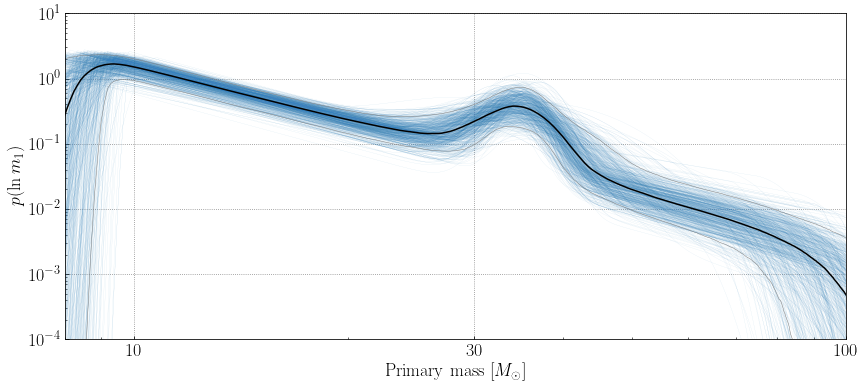

In [8]:
# Extract things from the hdf file
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]

# Grid over which to evaluate masses
mass_grid = np.linspace(5,100,1000)
p_lnm1 = np.zeros((alpha.size,mass_grid.size))
for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    p_m1_unnormed = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    
    # Normalize and multiply by m1 to obtain p_lnm1
    p_lnm1[i,:] = p_m1_unnormed/np.trapz(p_m1_unnormed,mass_grid)*mass_grid

fig,ax = plt.subplots(figsize=(14,6))

for i in np.random.choice(range(mu_m1.size),750):
    ax.plot(mass_grid,p_lnm1[i,:],color='#3182bd',alpha=0.25,lw=0.15)
    
ax.plot(mass_grid,np.median(p_lnm1,axis=0),color='black')
ax.plot(mass_grid,np.quantile(p_lnm1,0.05,axis=0),color='grey',lw=0.5)
ax.plot(mass_grid,np.quantile(p_lnm1,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(8,100)
ax.set_ylim(1e-4,10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([10,30,100])
ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xlabel('Primary mass [$M_\odot$]',fontsize=18)
ax.set_ylabel('$p(\ln m_1)$',fontsize=18)

plt.show()

### 2. Mass ratio

The below plot shows the source-frame merger rate density $\frac{d\mathcal{R}}{d\ln m_1 dq}$ evaluated at $m_1=20\,M_\odot$ and $z=0.2$ and marginalized over spins.

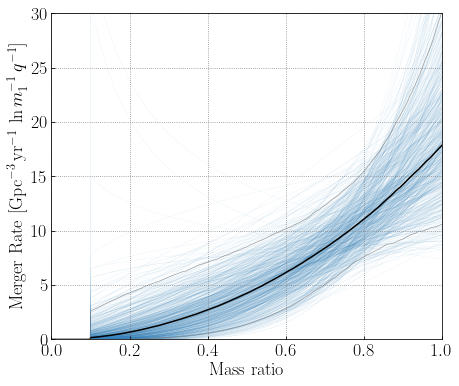

In [9]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
bq = hdata['posterior/bq'][()]

# Define grid over which to evaluate R(q)
q_grid = np.linspace(1e-3,1,1000)
dR_dqs = np.zeros((R_ref.size,q_grid.size))

for i in range(R_ref.size):
    
    # Probability density over mass ratios at m1=20
    m1_ref = 20.
    p_qs = (1.+bq[i])*q_grid**bq[i]/(1.-(tmp_min/m1_ref)**(1.+bq[i]))
    
    # Truncate below minimum mass ratio
    p_qs[q_grid<tmp_min/m1_ref] = 0
    
    # Construct full rate
    # Note that, by definition, R_ref already corresponds to the rate at m1=20 Msun and z=0.2
    # We still, however, need to multiply by m1 to convert from a rate per mass to a rate per *log* mass
    dR_dqs[i,:] = R_ref[i]*p_qs*m1_ref

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(dR_dqs.shape[0]),750):
    ax.plot(q_grid,dR_dqs[i,:],color='#3182bd',alpha=0.25,lw=0.15,zorder=0)

ax.plot(q_grid,np.median(dR_dqs,axis=0),color='black')
ax.plot(q_grid,np.quantile(dR_dqs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(q_grid,np.quantile(dR_dqs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1)
ax.set_ylim(0,30)
ax.set_xlabel('Mass ratio',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

Alternatively, we might integrate over $\ln m_1$ to obtain the merger rate $\frac{d\mathcal{R}}{dq}$ evaluated at $z=0.2$ (and still marginalized over spins).

**Another caution**: when integrating over $m_1$, the remaining overall structure of $R(q)$ is entirely dominated by our assumptions concerning minimum masses and truncations on the $p(q)$ distribution. The very slight jaggedness that can be seen at low $q$ below, for instance, corresponds to locations where $q$ falls below our minimum allowed mass ratio ($2\,M_\odot/m_1$) for different values of $m_1$, and hence $R(q,m_1)$ at these locations is sent to zero. The net effect is to produce an overall $R(q)$ that is sharply decreasing towards smaller $q$, but this is strongly impacted by our choice to truncate $q$ below some minimum value. Our truncation model here differs slightly from that in e.g. Abbott+ 2023, and so our plot will correspondingly look a bit different from e.g. Fig. 10 in Abbott+.

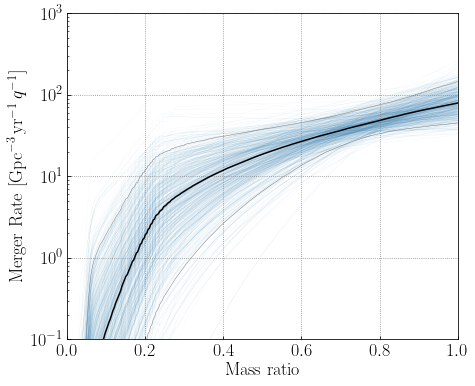

In [10]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]

# This time we'll need a 2D grid over primary masses and spins
mass_grid = np.linspace(5.,100.,300)
q_grid = np.linspace(1e-3,1,301)
Ms,Qs = np.meshgrid(mass_grid,q_grid)

dR_dqs = np.zeros((R_ref.size,q_grid.size))

for i in range(R_ref.size):
    
    # Variation in the merger rate over primary masses
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(Ms,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Probability densities over mass ratios, conditioned on each primary mass
    p_qs = (1.+bq[i])*Qs**bq[i]/(1.-(tmp_min/Ms)**(1.+bq[i]))
    p_qs[Qs<tmp_min/Ms] = 0
    
    # Construct full rate over the 2D mass vs. q space
    # Note that, by definition, R_ref already corresponds to the rate at m1=20 Msun and z=0.2
    dR_dm1s_dqs = R_ref[i]*f_m1*p_qs
    
    # Finally, integrate out masses
    dR_dqs[i,:] = np.trapz(dR_dm1s_dqs,mass_grid,axis=1)

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(dR_dqs.shape[0]),750):
    ax.plot(q_grid,dR_dqs[i,:],color='#3182bd',alpha=0.15,lw=0.15,zorder=0)

ax.plot(q_grid,np.median(dR_dqs,axis=0),color='black')
ax.plot(q_grid,np.quantile(dR_dqs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(q_grid,np.quantile(dR_dqs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1)
ax.set_ylim(1e-1,1e3)
ax.set_yscale('log')
ax.set_xlabel('Mass ratio',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

### 3. Joint m1-m2 distribution

So far we've been looking at one-dimensional representations of the primary mass/mass ratio distributions. We can alternatively plot the inferred rate $\frac{d\mathcal{R}}{dm_1\,dm_2}$ across both primary and secondary masses, again at fixed $z=0.2$.

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/281015062.py:29: RuntimeWarning: divide by zero encountered in true_divide
  p_m2s = (1.+bq[i])*M2s**bq[i]/(M1s**(1.+bq[i])-tmp_min**(1.+bq[i]))
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/281015062.py:37: RuntimeWarning: divide by zero encountered in log10
  log10_dR_dm1_dm2s = np.log10(dR_dm1_dm2s)
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/281015062.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(m1_grid,m2_grid,np.median(log10_dR_dm1_dm2s,axis=0).T,cmap='Blues',vmin=-4,vmax=2)
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/281015062.py:42: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call

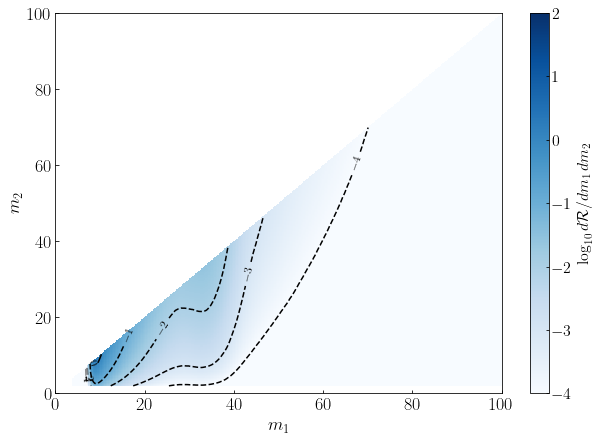

In [11]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]

# This time we'll need a 2D grid over primary masses and spins
m1_grid = np.linspace(2.,100.,300)
m2_grid = np.linspace(2.,100.,301)
M1s,M2s = np.meshgrid(m1_grid,m2_grid)

dR_dm1_dm2s = np.zeros((R_ref.size,m1_grid.size,m2_grid.size))

for i in range(R_ref.size):
    
    # Variation in the merger rate over primary masses
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(M1s,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Probability densities over mass ratios, conditioned on each primary mass
    p_m2s = (1.+bq[i])*M2s**bq[i]/(M1s**(1.+bq[i])-tmp_min**(1.+bq[i]))
    p_m2s[M1s<M2s] = 0
    p_m2s[M1s==tmp_min] = 0
    
    # Construct full rate over the 2D m1 vs. m2 space
    # Note that, by definition, R_ref already corresponds to the rate at m1=20 Msun and z=0.2
    dR_dm1_dm2s[i,:,:] = (R_ref[i]*f_m1*p_m2s).T
    
log10_dR_dm1_dm2s = np.log10(dR_dm1_dm2s)

fig,ax = plt.subplots(figsize=(10,7))

im = ax.pcolormesh(m1_grid,m2_grid,np.median(log10_dR_dm1_dm2s,axis=0).T,cmap='Blues',vmin=-4,vmax=2)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\log_{10}d\mathcal{R}/dm_1\,dm_2$",fontsize=16)

cs = ax.contour(m1_grid,m2_grid,np.median(log10_dR_dm1_dm2s,axis=0).T,levels=np.arange(-4,2),colors='black')
ax.clabel(cs, inline=True, fontsize=12)

ax.tick_params(labelsize=18)
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel('$m_1$',fontsize=18)
ax.set_ylabel('$m_2$',fontsize=18)

plt.show()

/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/3553441956.py:33: RuntimeWarning: divide by zero encountered in true_divide
  p_m2s = (1.+bq[i])*M2s**bq[i]/(M1s**(1.+bq[i])-tmp_min**(1.+bq[i]))
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/3553441956.py:41: RuntimeWarning: divide by zero encountered in log10
  log10_dR_dlnm1_dlnm2s = np.log10(dR_dlnm1_dlnm2s)
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/3553441956.py:45: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(m1_grid,m2_grid,np.median(log10_dR_dlnm1_dlnm2s,axis=0).T,cmap='Blues',vmin=-4,vmax=3)
/var/folders/b2/tcwq2bcs0214_0cxpktjl4t80000gn/T/ipykernel_58190/3553441956.py:46: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases la

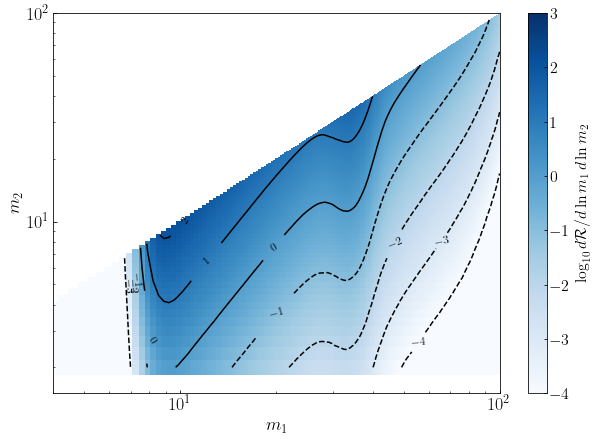

In [12]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]

# This time we'll need a 2D grid over primary masses and spins
ln_m1_grid = np.log(np.linspace(2.,100.,300))
ln_m2_grid = np.log(np.linspace(2.,100.,301))
ln_M1s,ln_M2s = np.meshgrid(ln_m1_grid,ln_m2_grid)
m1_grid = np.exp(ln_m1_grid)
m2_grid = np.exp(ln_m2_grid)
M1s = np.exp(ln_M1s)
M2s = np.exp(ln_M2s)

dR_dlnm1_dlnm2s = np.zeros((R_ref.size,ln_m1_grid.size,ln_m2_grid.size))

for i in range(R_ref.size):
    
    # Variation in the merger rate over primary masses
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(M1s,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])/f_m1_norm
    
    # Probability densities over mass ratios, conditioned on each primary mass
    p_m2s = (1.+bq[i])*M2s**bq[i]/(M1s**(1.+bq[i])-tmp_min**(1.+bq[i]))
    p_m2s[M1s<M2s] = 0
    p_m2s[M1s==tmp_min] = 0
    
    # Construct full rate over the 2D ln_m1 vs. ln_m2 space
    # Note that, by definition, R_ref already corresponds to the rate at m1=20 Msun and z=0.2
    dR_dlnm1_dlnm2s[i,:,:] = (R_ref[i]*f_m1*p_m2s*M1s*M2s).T
    
log10_dR_dlnm1_dlnm2s = np.log10(dR_dlnm1_dlnm2s)

fig,ax = plt.subplots(figsize=(10,7))

im = ax.pcolormesh(m1_grid,m2_grid,np.median(log10_dR_dlnm1_dlnm2s,axis=0).T,cmap='Blues',vmin=-4,vmax=3)
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("$\log_{10}d\mathcal{R}/d\ln m_1\,d\ln m_2$",fontsize=16)

cs = ax.contour(m1_grid,m2_grid,np.median(log10_dR_dlnm1_dlnm2s,axis=0).T,levels=np.arange(-4,3),colors='black')
ax.clabel(cs, inline=True, fontsize=12)

ax.tick_params(labelsize=18)
ax.set_xlim(4,100)
ax.set_ylim(1.5,100)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$m_1$',fontsize=18)
ax.set_ylabel('$m_2$',fontsize=18)

plt.show()

### 5. Redshifts

Plot the evolution of the merger rate $\frac{d\mathcal{R}}{d\ln m_1 dq}$ across redshift, evaluated at fixed $m_1 = 20\,M_\odot$ and $q=1$.

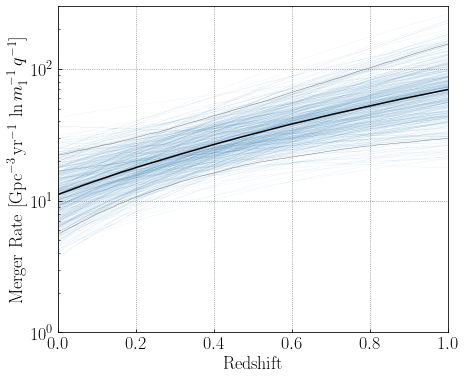

In [13]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
bq = hdata['posterior/bq'][()]
kappa = hdata['posterior/kappa'][()]

# Grid over which to evaluate R(z)
z_grid = np.linspace(0,1.5,500)
R_zs = np.zeros((R_ref.size,z_grid.size))

for i in range(R_ref.size):
    
    # Probability density at q=1, given m1=20
    p_q_1 = (1.+bq[i])/(1. - (tmp_min/20.)**(1.+bq[i]))
    
    # Construct merger rate at z=0.2, m1=20, q=1
    # The first two are already baked into the definition of R_ref,
    # although we need to multiply by m1 to convert from dR/dm1 to dR/dlnm1
    R_z_02 = R_ref[i]*p_q_1*20.
    
    # Now extend across all redshifts according to our power law model
    R_zs[i,:] = R_z_02*((1.+z_grid)/(1.+0.2))**kappa[i]

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(R_zs.shape[0]),500):
    ax.plot(z_grid,R_zs[i,:],color='#3182bd',alpha=0.25,lw=0.15,zorder=0)

ax.plot(z_grid,np.median(R_zs,axis=0),color='black')
ax.plot(z_grid,np.quantile(R_zs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(z_grid,np.quantile(R_zs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1.)
ax.set_ylim(1,300)
ax.set_yscale('log')
ax.set_xlabel('Redshift',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}\,\ln m_1^{-1}\,q^{-1}$]',fontsize=18)

plt.show()

Instead integrate $\frac{d\mathcal{R}}{d\ln m_1 dq}$ over log-mass and mass ratio, plotting the total inferred merger rate vs. $z$:

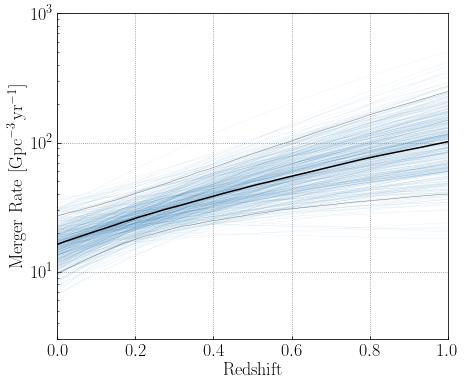

In [14]:
# Extract things from the hdf file
R_ref = hdata['posterior/R_ref'][()]
alpha = hdata['posterior/alpha'][()]
mu_m1 = hdata['posterior/mu_m1'][()]
sig_m1 = hdata['posterior/sig_m1'][()]
log_f_peak = hdata['posterior/log_f_peak'][()]
mMin = hdata['posterior/mMin'][()]
mMax = hdata['posterior/mMax'][()]
log_dmMin = hdata['posterior/log_dmMin'][()]
log_dmMax = hdata['posterior/log_dmMax'][()]
bq = hdata['posterior/bq'][()]
kappa = hdata['posterior/kappa'][()]

# Grid over which to evaluate R(z)
mass_grid = np.linspace(5,100,1000)
z_grid = np.linspace(0,1.5,500)
R_zs = np.zeros((R_ref.size,z_grid.size))

for i in range(R_ref.size):
    
    # Compute dependence of merger rate on primary mass
    f_m1_norm = massModel(20.,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1 = massModel(mass_grid,alpha[i],mu_m1[i],sig_m1[i],10.**log_f_peak[i],mMax[i],mMin[i],
                    10.**log_dmMax[i],10.**log_dmMin[i])
    f_m1_integral = np.trapz(f_m1/f_m1_norm,mass_grid)
    
    # Construct full integrated merger rate
    R_z_02 = R_ref[i]*f_m1_integral
    
    # Now extend across all redshifts according to our power law model
    R_zs[i,:] = R_z_02*((1.+z_grid)/(1.+0.2))**kappa[i]

fig,ax = plt.subplots(figsize=(7,6))

for i in np.random.choice(range(R_zs.shape[0]),500):
    ax.plot(z_grid,R_zs[i,:],color='#3182bd',alpha=0.25,lw=0.15,zorder=0)

ax.plot(z_grid,np.median(R_zs,axis=0),color='black')
ax.plot(z_grid,np.quantile(R_zs,0.05,axis=0),color='grey',lw=0.5)
ax.plot(z_grid,np.quantile(R_zs,0.95,axis=0),color='grey',lw=0.5)

ax.tick_params(labelsize=18)
ax.set_xlim(0,1.)
ax.set_ylim(3,1000)
ax.set_yscale('log')
ax.set_xlabel('Redshift',fontsize=18)
ax.set_ylabel('Merger Rate [$\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}$]',fontsize=18)

plt.show()